## Connecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.5 MB/s eta 0:00:00


## Displaying Images

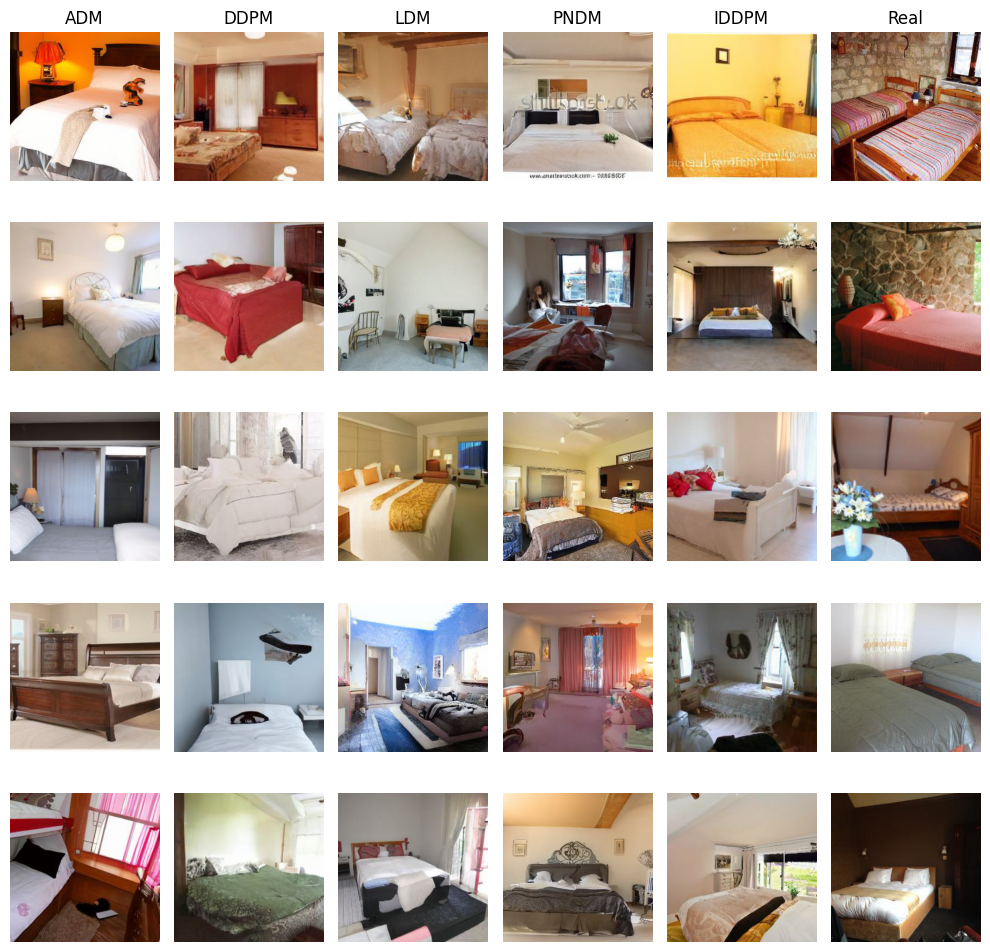

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_images(root_folder, num_images=5):
    subfolders = [subfolder for subfolder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, subfolder))]

    subfolders = ['ADM', 'DDPM', 'LDM', 'PNDM', 'IDDPM', 'Real']


    # Create a dictionary to store images for each subfolder
    image_dict = {subfolder: [] for subfolder in subfolders}

    # Collect images for each subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(root_folder, subfolder)
        image_files = os.listdir(folder_path)

        count = 0
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)

            if image is not None:
                image_dict[subfolder].append(image)
                count += 1

            if count == num_images:
                break

    # Display the images in the desired format
    num_columns = len(subfolders)
    num_rows = num_images

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))

    for row in range(num_rows):
        for col, subfolder in enumerate(subfolders):
            images = image_dict[subfolder]

            if row < len(images):
                axes[row, col].imshow(images[row])
                axes[row, col].axis('off')
            else:
                # Display an empty space if there are no more images
                axes[row, col].axis('off')

    # Set the subfolder names as column labels
    for ax, col in zip(axes[0], range(num_columns)):
        ax.set_title(subfolders[col])

    plt.tight_layout()
    plt.show()

## Function Calling

root_folder = "/content/drive/MyDrive/Trail_2000"
num_images_per_folder = 5

visualize_images(root_folder, num_images_per_folder)


## Displaying Image Details

In [ ]:
!pip install PrettyTable
!pip install colorama


In [ ]:
import os
from PIL import Image
from tabulate import tabulate
from colorama import Fore, Style

def get_image_details_from_folders(root_folder):
    subfolders = [subfolder for subfolder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, subfolder))]
    subfolders = ['ADM', 'DDPM', 'LDM', 'PNDM', 'IDDPM', 'Real']
    image_details = []

    for subfolder in subfolders:
        folder_path = os.path.join(root_folder, subfolder)
        image_files = os.listdir(folder_path)

        if image_files:
            image_file = image_files[0]  # Get the first image in the folder
            image_path = os.path.join(folder_path, image_file)
            image = Image.open(image_path)
            image_format = image.format
            image_size = image.size
            image_pixels = image_size[0] * image_size[1]
            image_ratio = image_size[0] / image_size[1]
            file_size = os.path.getsize(image_path)

            details = {
                'Folder': subfolder,
                'Format': image_format,
                'Size': image_size,
                'Pixels': image_pixels,
                'Aspect Ratio': image_ratio
                # 'File Size': file_size
            }
            image_details.append(details)

    headers = image_details[0].keys()
    rows = [list(detail.values()) for detail in image_details]

    table = tabulate(rows, headers, tablefmt='grid')

    # Add colors to the table headers and rows
    colored_headers = [f"{Fore.BLUE}{Style.BRIGHT}{header}{Style.RESET_ALL}" for header in headers]
    colored_rows = [[f"{Fore.GREEN}{cell}{Style.RESET_ALL}" for cell in row] for row in rows]

    table = tabulate(colored_rows, colored_headers, tablefmt='grid')

    # Set the title for the table
    title = f"{Fore.YELLOW}{Style.BRIGHT}Image Details by Architecture{Style.RESET_ALL}"
    table_with_title = title + "\n" + table

    print(table_with_title)


root_folder = "/content/drive/MyDrive/Trail_2000"
get_image_details_from_folders(root_folder)


Image Details by Architecture
+----------+----------+------------+----------+----------------+
| Folder   | Format   | Size       |   Pixels |   Aspect Ratio |
+==========+==========+============+==========+================+
| ADM      | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| DDPM     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| LDM      | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| PNDM     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| IDDPM    | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+----------------+
| Real     | PNG      | (256, 256) |    65536 |              1 |
+----------+----------+------------+----------+-------------

## 1. Autocorrelation

Processing subfolder: ADM
1000


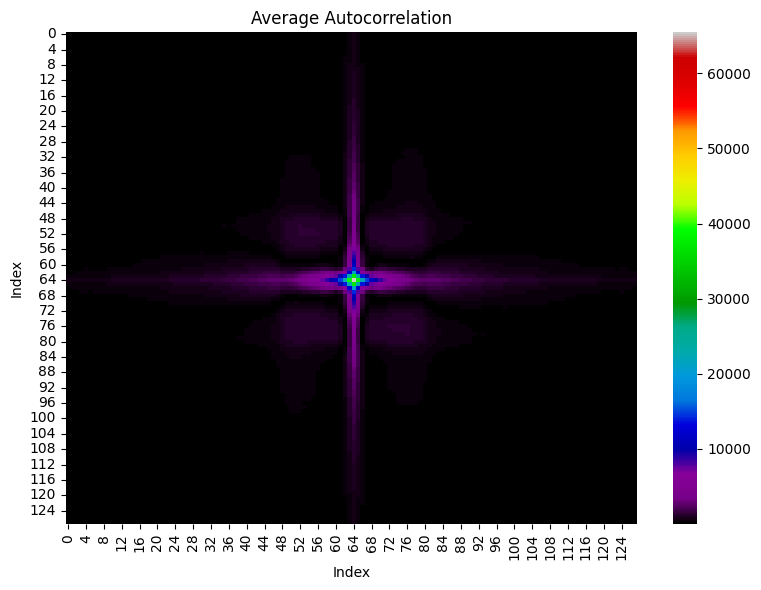

Mean: (-5.329070518200751e-15+6.162975822039155e-33j)
Max: (65439.244509563876+0j)
Min: (-1315.2111996630354-2.325564238462471e-14j)
SD: 603.5271688644966
Processing subfolder: DDPM
1000


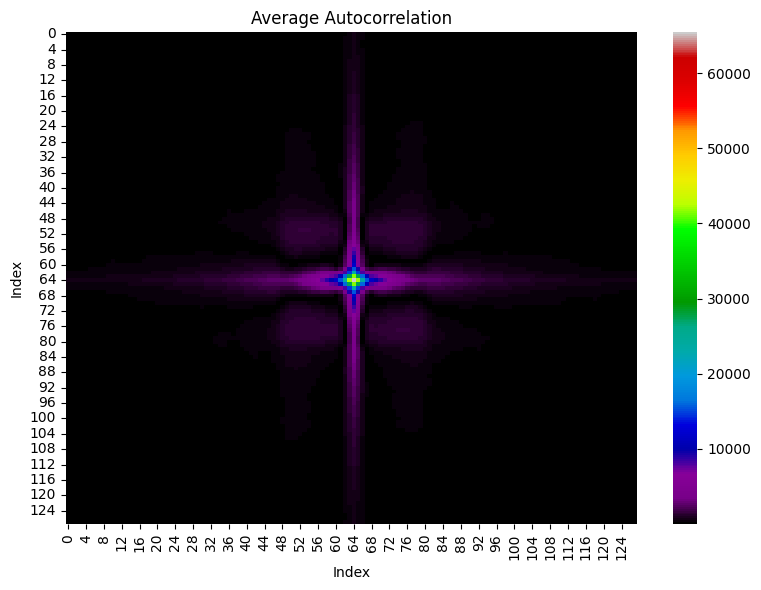

Mean: (-4.440892098500626e-16-2.465190328815662e-32j)
Max: (65412.382977642665+0j)
Min: (-1544.8943898692457+1.6680298464164537e-14j)
SD: 657.136842859528
Processing subfolder: LDM
1000


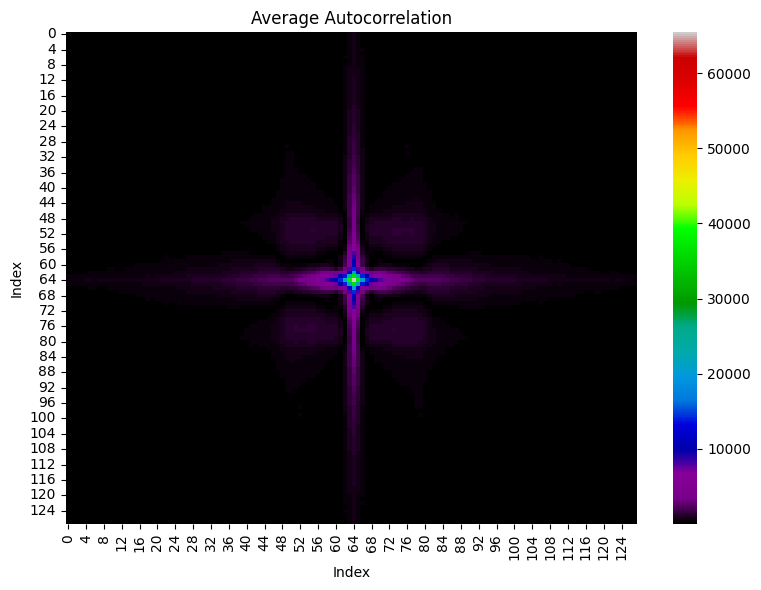

Mean: (-2.6645352591003757e-15-2.465190328815662e-32j)
Max: (65437.258512832625+0j)
Min: (-1312.2513030417074-2.685413715328502e-14j)
SD: 593.8661547196745
Processing subfolder: Real
1000


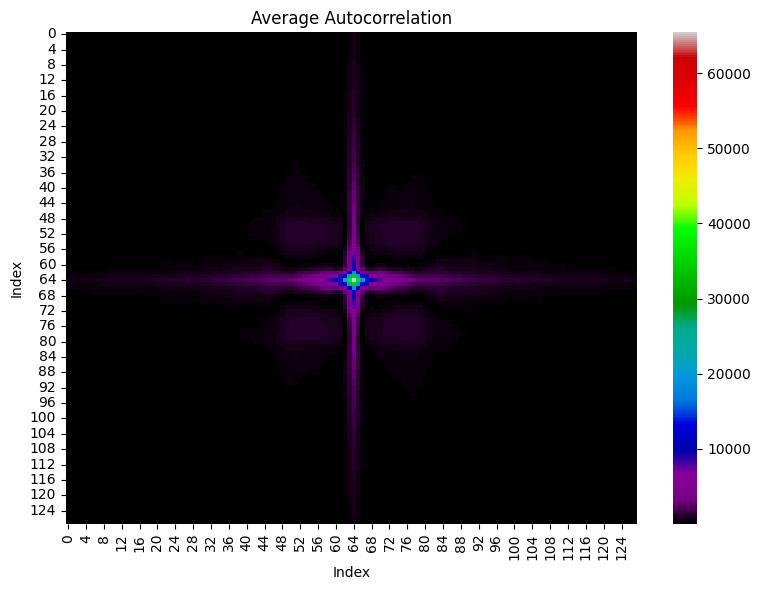

Mean: (3.552713678800501e-15-8.936314941956774e-32j)
Max: (65430.64852480344+0j)
Min: (-1163.3143567534528-1.0218723239572959e-14j)
SD: 565.8820307511778
Processing subfolder: PNDM
1000


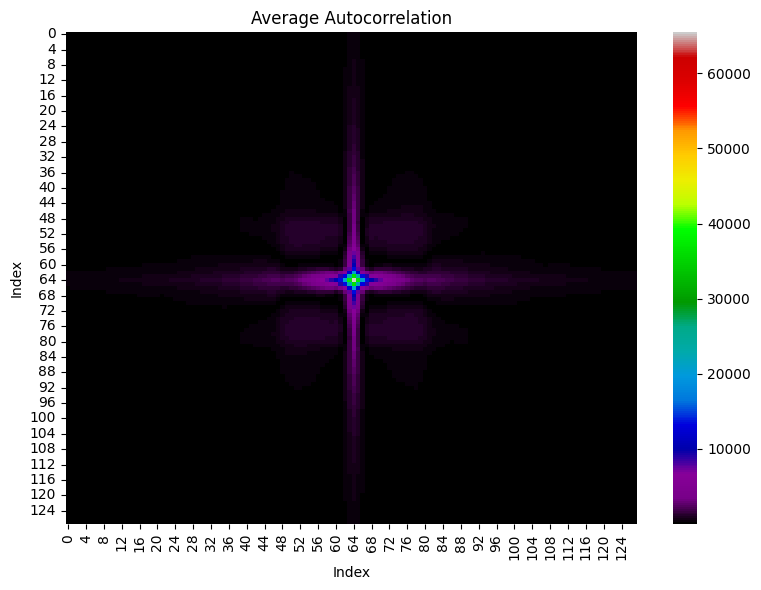

Mean: (-1.7763568394002505e-15+1.8488927466117464e-32j)
Max: (65445.55074525603+0j)
Min: (-1226.4898088143357-7.332485928897741e-15j)
SD: 575.7754097362724
Processing subfolder: IDDPM
1000


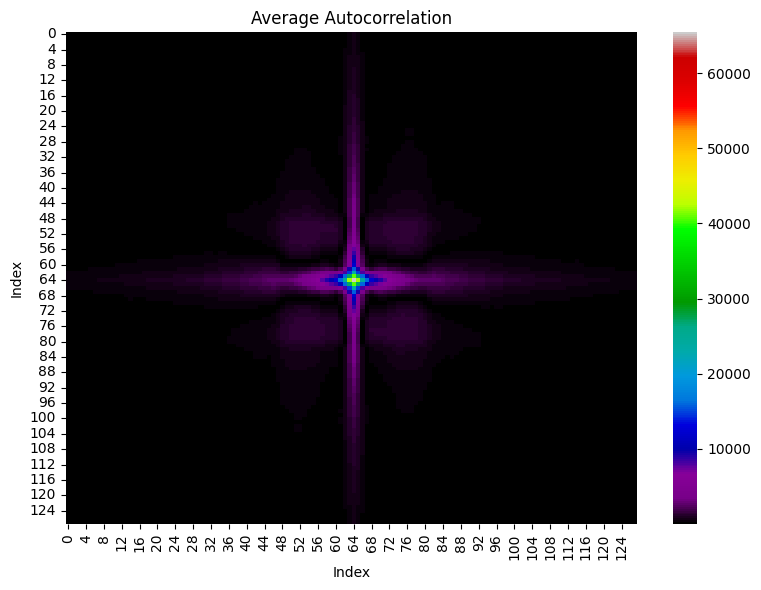

Mean: (-4.440892098500626e-15+1.1709654061874394e-31j)
Max: (65418.64208320235+0j)
Min: (-1521.3444712254845-1.8254602338538322e-14j)
SD: 659.1372484845127


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        # fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))
        fft_image = (np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
          power_spectrum = np.abs(fft_image) ** 2
        else:
          power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power

    return mean_power

def compute_image_autocorrelation(image, mean_power):
    # Convert the image to a floating-point array
    image_array = np.array(image, dtype=np.float64)
    image_shape = image_array.shape

    # Subtract the mean to center the image
    centered_image = image_array - np.mean(image_array)

    # Calculate the autocorrelation using FFT and inverse FFT
    autocorr_fft = np.fft.fft2(centered_image) * np.conj(np.fft.fft2(centered_image))
    autocorr = np.fft.ifft2(autocorr_fft)

    # # Normalize the autocorrelation by the number of pixels
    # normalization_factor = image_shape[0] * image_shape[1]
    # autocorr /= normalization_factor
    autocorr /= mean_power

    # Shift the autocorrelation to center the pixel
    autocorr = np.fft.fftshift(autocorr)

    return autocorr

def calculate_autocorrelation(images, mean_power):
    num_images = len(images)
    autocorr_sum = 0
    print(num_images)

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Calculate the autocorrelation using FFT and inverse FFT
        autocorr = compute_image_autocorrelation(denoised_image, mean_power)
        autocorr_sum += autocorr

    # Calculate the average autocorrelation
    avg_autocorr = autocorr_sum / num_images

    return avg_autocorr


# def display_results(avg_autocorr):
#     # Take the absolute value of the autocorrelation result
#     avg_autocorr_abs = np.abs(avg_autocorr)

#     # Plot Average Autocorrelation as a Heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(avg_autocorr_abs, cmap='viridis')
#     # sns.heatmap(avg_autocorr_abs, cmap='viridis', center=0, square=True)

#     plt.title('Average Autocorrelation')
#     plt.xlabel('Index')
#     plt.ylabel('Index')
#     plt.tight_layout()
#     plt.show()

def display_results(avg_autocorr):
    # Take the absolute value of the autocorrelation result
    avg_autocorr_abs = np.abs(avg_autocorr)

    # Calculate the size of the power spectrum
    height, width = avg_autocorr_abs .shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_autocorrelation = avg_autocorr_abs [start_row:start_row + new_size, start_col:start_col + new_size]

    # Plot Average Autocorrelation as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_autocorrelation , cmap='nipy_spectral')
    # sns.heatmap(cropped_autocorrelation , cmap='viridis', center=0, square=True)

    plt.title('Average Autocorrelation')
    plt.xlabel('Index')
    plt.ylabel('Index')
    plt.tight_layout()
    plt.show()



def calculate_power_spectrum_statistics(avg_autocorr):
    # Calculate statistics
    avg_autocorr_mean = np.mean(avg_autocorr)
    avg_autocorr_max = np.max(avg_autocorr)
    avg_autocorr_min = np.min(avg_autocorr)
    avg_autocorr_std = np.std(avg_autocorr)

    # Print numerical results
    # print(f"\nAverage Autocorrelation: {avg_autocorr}")
    print("Mean:", avg_autocorr_mean)
    print("Max:", avg_autocorr_max)
    print("Min:", avg_autocorr_min)
    print("SD:", avg_autocorr_std)


# Example usage
root_path = '/content/drive/MyDrive/Trail'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]


    # Calculate average autocorrelation
    mean_power = calculate_power_spectrum(images)

    # Calculate average autocorrelation
    avg_autocorr = calculate_autocorrelation(images, mean_power)

    # Display the results
    display_results(avg_autocorr)

    calculate_power_spectrum_statistics(avg_autocorr)

## 2. Power Spectrum

Processing subfolder: ADM


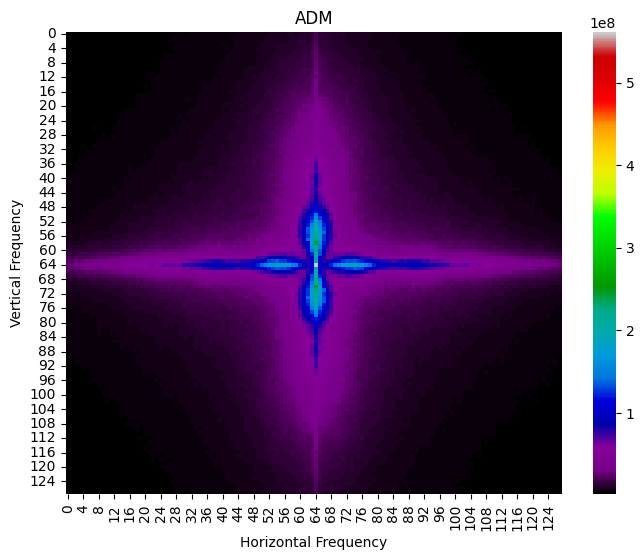

Mean Power: 88.50142207336427
Processing subfolder: DDPM


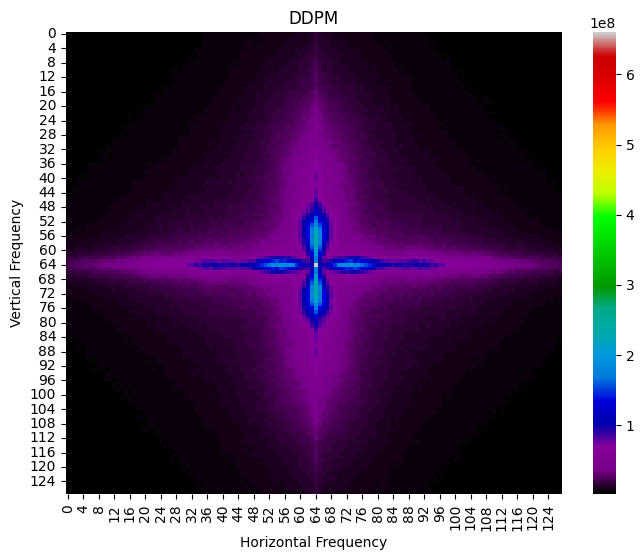

Mean Power: 81.5165910949707
Processing subfolder: LDM


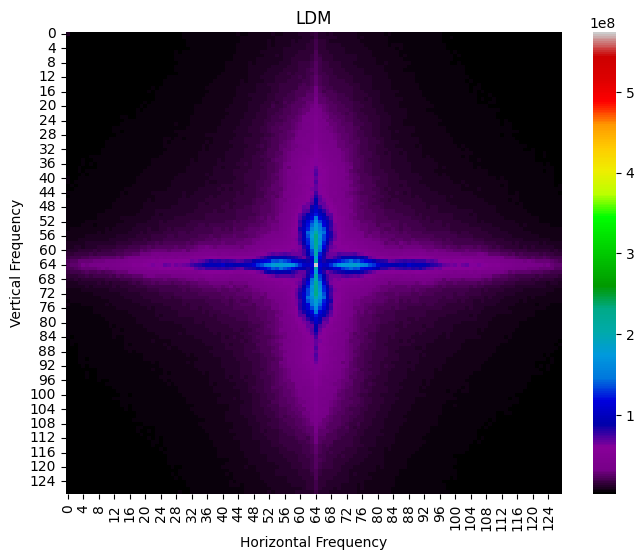

Mean Power: 88.72489582824706
Processing subfolder: Real


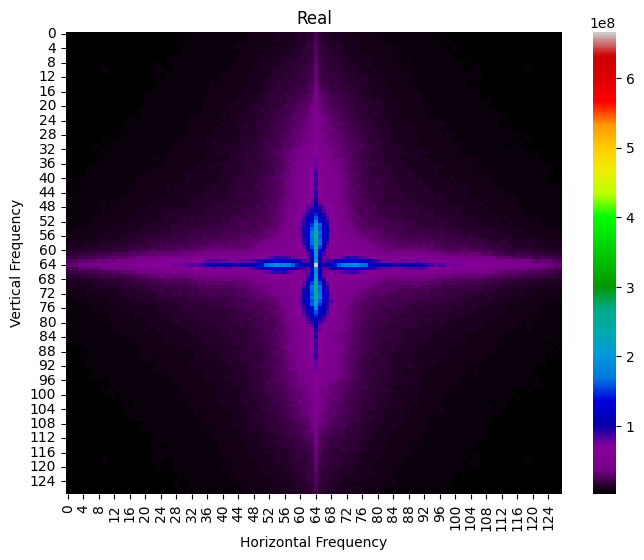

Mean Power: 96.49202139282228
Processing subfolder: PNDM


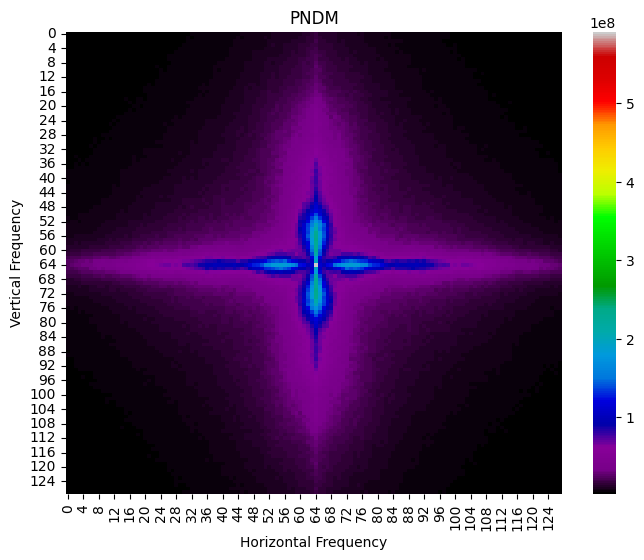

Mean Power: 99.69624111938478
Processing subfolder: IDDPM


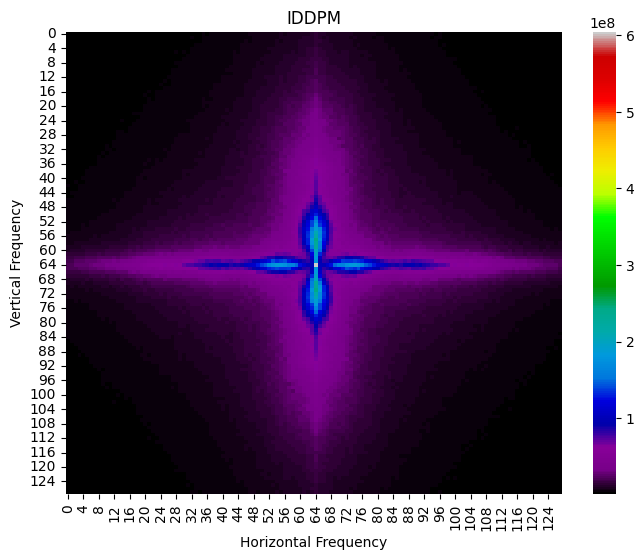

Mean Power: 78.52430043029784


In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt


def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return noise_residuals

def calculate_power_spectrum(images):
    # Calculate the power spectrum for a set of images
    num_images = len(images)
    power_spectrum = None
    mean_power = 0

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Apply denoising
        denoised_image = denoise_image(image)

        # Compute the Fourier transform of the image
        fft_image = np.fft.fftshift(np.fft.fft2(denoised_image))

        # Calculate the power spectrum by taking the squared magnitude of the Fourier coefficients
        if power_spectrum is None:
            power_spectrum = np.abs(fft_image) ** 2
        else:
            power_spectrum += np.abs(fft_image) ** 2

    # Average the power spectrum over all images
    power_spectrum /= num_images

    # Normalize the power spectrum by dividing by the mean value
    mean_power = np.mean(power_spectrum/ (image.shape[0] * image.shape[1]))
    normalized_power_spectrum = power_spectrum / mean_power



    # # Normalize the power spectrum by dividing by the mean value
    # mean_power = np.mean(power_spectrum)

    return power_spectrum, mean_power

def display_power_spectrum(power_spectrum, subfolder):
    # Calculate the size of the power spectrum
    height, width = power_spectrum.shape
    new_size = 128

    # Calculate the starting indices for the middle 64x64 portion
    start_row = (height - new_size) // 2
    start_col = (width - new_size) // 2

    # Extract the middle 64x64 portion of the power spectrum
    cropped_power_spectrum = power_spectrum[start_row:start_row + new_size, start_col:start_col + new_size]

    # Display the cropped power spectrum as a heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cropped_power_spectrum, cmap='nipy_spectral')
    plt.title(f'{subfolder}')
    plt.xlabel('Horizontal Frequency')
    plt.ylabel('Vertical Frequency')
    plt.show()

def calculate_power_spectrum_statistics(power_spectrum):
    # Calculate statistical information of the power spectrum
    mean_power = np.mean(power_spectrum)
    max_power = np.max(power_spectrum)
    min_power = np.min(power_spectrum)
    std_power = np.std(power_spectrum)

    return mean_power, max_power, min_power, std_power


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:100]
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate power spectrum
    power_spectrum_org, mean_power = calculate_power_spectrum(images)

    # Display the power spectrum
    display_power_spectrum(power_spectrum_org, subfolder)

    # Print statistical information
    print("Mean Power:", mean_power)

    # # Save the power spectrum as a PNG image
    # save_path = os.path.join(output_path, subfolder + f"_power_spectrum_{subfolder}_Power_Spectrum.png")
    # cv2.imwrite(save_path, power_spectrum)
    # print("Power spectrum saved as:", save_path)


## 3. Radial Spectrum

Processing subfolder: ADM
1000
Processing subfolder: DDPM
1000
Processing subfolder: LDM
1000
Processing subfolder: Real
1000
Processing subfolder: PNDM
1000
Processing subfolder: IDDPM
1000


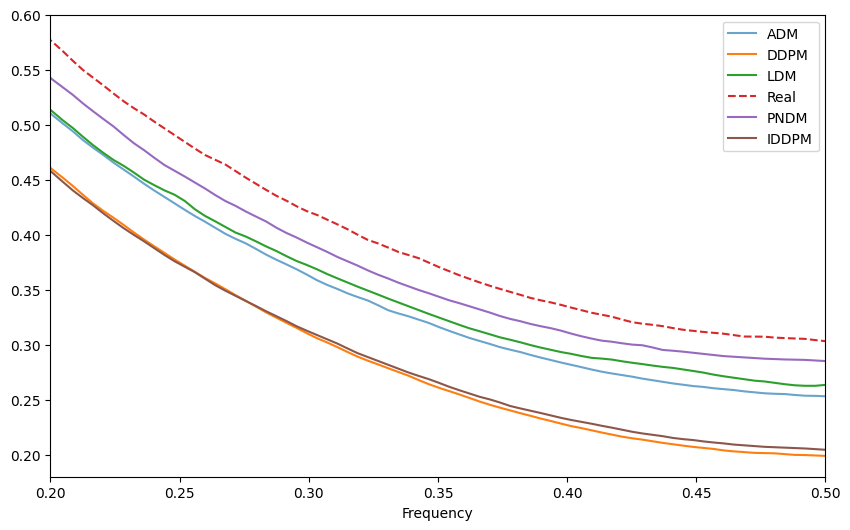

In [ ]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to a width of 126 pixels while maintaining the aspect ratio
    # aspect_ratio = image.shape[1] / image.shape[0]  # Compute the aspect ratio
    # new_width = 300
    # new_height = int(new_width / aspect_ratio)
    # resized_image = cv2.resize(image, (new_width, new_height))
    # print(image.shape, resized_image.shape)
    return image
# def denoise_image(image):
#     # Assuming grayscale denoising for simplicity
#     denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
#     noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
#     return denoised_image

# def load_image(image_path):
#     # Load the image using OpenCV
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     # Denoise the image
#     denoised_image = denoise_image(image)
#     return denoised_image
def calculate_radial_spectrum(image, num_steps, frequency_range):
    # Compute the Fourier transform of the image
    # fourier_transform = np.fft.fftshift(np.fft.fft2(image))
    fourier_transform = (np.fft.fft2(image))
    spectrum = np.abs(fourier_transform)

    # Define the distance range for the radial spectrum
    min_rho, max_rho = frequency_range
    rho_values = np.linspace(min_rho, max_rho, num=num_steps)

    # Calculate the radial spectrum for each distance
    radial_spectrum = np.zeros(num_steps)
    for i, rho in enumerate(rho_values):
        # Define the annulus between radii rho - delta_rho and rho + delta_rho
        delta_rho = (max_rho - min_rho) / num_steps
        annulus = np.logical_and(rho - delta_rho <= np.abs(np.fft.fftfreq(image.shape[0])),
                                 np.abs(np.fft.fftfreq(image.shape[1])) <= rho + delta_rho)

        # Average the values within the annulus
        radial_spectrum[i] = np.mean(spectrum[annulus])
    # Normalize the spectrum by dividing by the standard deviation
    radial_spectrum /= np.std(radial_spectrum)

    return rho_values, radial_spectrum

def compute_radial_spectra(images, num_images, freq_range=(0, 0.5), num_steps=128):
    spectra = []
    for image_path in images[:num_images]:
        # Load the image
        image = load_image(image_path)

        # Compute the radial spectrum for the image
        freq_values, spectrum = calculate_radial_spectrum(image, num_steps, freq_range)
        spectra.append(spectrum)

    return freq_values, spectra

# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

plt.figure(figsize=(10, 6))  # Set figure size

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    num_images = len(image_files)
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]
    print(num_images)
    # Calculate radial spectra
    freq_values, spectra = compute_radial_spectra(images, num_images = num_images)

    # Average the spectra
    avg_spectrum = np.mean(spectra, axis=0)
    color_map = {
        'Real': '#d7282a',   # Assign 'crimson' to 'Real' subfolder
        'ADM': '#69a4cc',
        'DDPM': '#fe7f0f',
        'IDDPM': '#8c574a',
        'LDM': '#2ca02c',
        'PNDM': '#976abf',
    }
    color = color_map.get(subfolder, 'gray')  # Use 'gray' as the default color if not found in the color_map
    # Plot the average spectrum
    if subfolder == 'Real':
      plt.plot(freq_values, avg_spectrum, label=subfolder, color = color, linestyle = '--')
    else:
      plt.plot(freq_values, avg_spectrum, label=subfolder, color = color, linestyle = '-')
    # plt.plot(freq_values, avg_spectrum, label=subfolder)
plt.xlabel('Frequency')
plt.ylabel('')
plt.ylim(0.18, 0.6)
# plt.ylim(0, 1)
plt.xlim(0.2, 0.5)
# plt.title('Radial Spectrum')
plt.legend()
plt.show()
    # # Save the average spectrum as a PNG image
    # save_path = os.path.join(output_path, f"average_spectrum_{subfolder}.png")
    # plt.savefig(save_path)
    # print("Average spectrum saved as:", save_path)


## 4. Angular Spectrum

Processing subfolder: ADM
1000
Processing subfolder: DDPM
1000
Processing subfolder: LDM
1000
Processing subfolder: Real
1000
Processing subfolder: PNDM
1000
Processing subfolder: IDDPM
1000


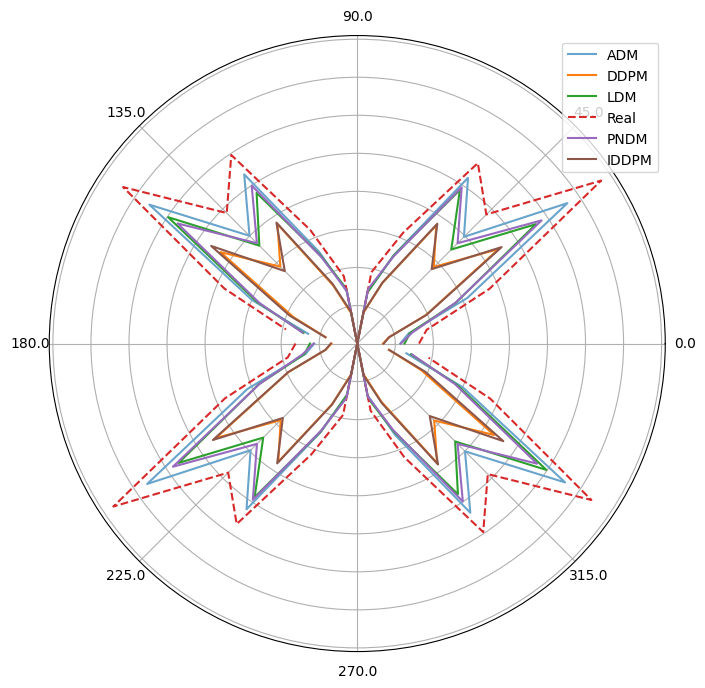

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

# def load_image(image_path):
#     # Load the image using OpenCV
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     return image

def denoise_image(image):
    # Assuming grayscale denoising for simplicity
    denoised_image = cv2.fastNlMeansDenoising(image, None, h=20, templateWindowSize=9, searchWindowSize=32)
    noise_residuals = image.astype(np.float32) - denoised_image.astype(np.float32)
    return denoised_image

def load_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Denoise the image
    denoised_image = denoise_image(image)
    return denoised_image

def calculate_angular_spectrum(image, num_steps, angle_range, cutoff_frequency):
    # Compute the Fourier transform of the image
    fourier_transform = np.fft.fftshift(np.fft.fft2(image))
    # fourier_transform = np.fft.fft2(image)

    # Apply low-pass filtering to remove non-informative low-frequency content
    low_pass = np.abs(np.fft.fftfreq(image.shape[0])) <= cutoff_frequency
    fourier_transform[low_pass] = 0.1

    # Define the angle range for the angular spectrum
    min_angle, max_angle = angle_range
    angle_values = np.linspace(min_angle, max_angle, num=num_steps, endpoint=False)
    angle_values = np.unwrap(angle_values)  # Normalize the angle values

    # Calculate the angular spectrum for each angle
    angular_spectrum = np.zeros(num_steps)
    for i, angle in enumerate(angle_values):
        # Calculate the corresponding indices in the Fourier transform based on angle
        x = np.cos(angle)
        y = np.sin(angle)
        indices = np.around(x * (image.shape[1] - 1)).astype(int), np.around(y * (image.shape[0] - 1)).astype(int)

        # Average the values at the indices
        angular_spectrum[i] = np.mean(np.abs(fourier_transform[indices]))

    return angle_values, angular_spectrum


def plot_angular_spectrum(image_path, num_steps, angle_range, cutoff_frequency):
    # Load the image
    image = load_image(image_path)

    # Calculate the angular spectrum
    angle_values, spectrum = calculate_angular_spectrum(image, num_steps, angle_range, cutoff_frequency)

    # Plot the angular spectrum in a polar plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angle_values, spectrum)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num=num_steps, endpoint=False))
    ax.set_xticklabels(np.linspace(0, 360, num=num_steps, endpoint=False))
    ax.set_title('Angular Spectrum')
    ax.set_rticks([])
    ax.grid(True)
    plt.show()


# Example usage
root_path = '/content/drive/MyDrive/Trail'
output_path = '/content/drive/MyDrive/Results'

subfolders = [subfolder for subfolder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, subfolder))]

# Initialize arrays to store spectra
spectra_all = []

plt.figure(figsize=(8, 8))  # Set figure size
ax = plt.subplot(111, polar=True)  # Create a polar subplot

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)
    image_files = [file for file in os.listdir(subfolder_path) if file.endswith('.png')]
    print(f"Processing subfolder: {subfolder}")
    # image_files = image_files[:10]
    print(len(image_files))
    images = [os.path.join(subfolder_path, image_file) for image_file in image_files]

    # Calculate angular spectra
    angle_values, spectra, spectra_all = [], [], []

    for image_path in images:
        # Load the image
        image = load_image(image_path)

        # Calculate angular spectrum power density
        angle_vals, spectrum = calculate_angular_spectrum(image, num_steps=16, angle_range=(0, np.pi), cutoff_frequency=0)
        angle_values = angle_vals
        spectra.append(spectrum)

    # Store the spectra
    spectra_all.extend(spectra)

    # Compute the average spectrum
    avg_spectrum = np.mean(spectra_all, axis=0)
    # color = np.random.rand(3,)  # Random color for each subfolder
    # Define a color map to assign colors to subfolders
    color_map = {
        'Real': '#d7282a',   # Assign 'crimson' to 'Real' subfolder
        'ADM': '#69a4cc',
        'DDPM': '#fe7f0f',
        'IDDPM': '#8c574a',
        'LDM': '#2ca02c',
        'PNDM': '#976abf',
    }
    color = color_map.get(subfolder, 'gray')  # Use 'gray' as the default color if not found in the color_map
    label = subfolder
    if "Real" in subfolder:
        # Plot "real" subfolder spectra as dashed lines
        original_line_real, = ax.plot(angle_values, avg_spectrum, label=label, color=color, linestyle='--')
    else:
        # Plot synthetic subfolder spectra as solid lines
        original_line, = ax.plot(angle_values, avg_spectrum, label=label, color=color, linestyle='-')

    # Plot the mirror image (180 to 360 degrees) using the same color and label
    mirror_spectrum = np.flip(np.flip(avg_spectrum))

    if "Real" in subfolder:
      mirror_line, = ax.plot(angle_values + np.pi, mirror_spectrum, color=original_line_real.get_color(), linestyle=original_line_real.get_linestyle())
    else:
      mirror_line, = ax.plot(angle_values + np.pi, mirror_spectrum, color=original_line.get_color(), linestyle=original_line.get_linestyle())
    # ax.fill_between(np.concatenate((angle_values, angle_values + np.pi)), np.concatenate((avg_spectrum, mirror_spectrum)), color=color)

    # # Plot the average spectrum as a filled area in the radar chart
    # ax.fill(angle_values, avg_spectrum, alpha=0.25)

# Set the x-axis tick labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax.set_xticklabels(np.linspace(0, 360, 8, endpoint=False))
ax.set_yticklabels([])

# Add legend and title
plt.legend()
# plt.title('Average Angular Spectrum')

# Show the plot
plt.show()


In [ ]:
!pip install plotly
